In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import preprocessing

In [3]:
df = pd.read_csv('uber.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [6]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
df = df.drop(['Unnamed: 0', 'key'], axis=1)

In [8]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isna().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [13]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [12]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce') 

In [17]:
df= df.assign(hour = df.pickup_datetime.dt.hour, 
day = df.pickup_datetime.dt.day, 
month= df.pickup_datetime.dt.month, 
year = df.pickup_datetime.dt.year, 
dayofweek= df.pickup_datetime.dt.dayofweek)

In [18]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3


In [19]:
df = df.drop('pickup_datetime',axis=1)

In [20]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0,49,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,0,9,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,42,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,25,56,14,20,5,2015,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   second             199999 non-null  int32  
 7   minute             199999 non-null  int32  
 8   hour               199999 non-null  int32  
 9   day                199999 non-null  int32  
 10  month              199999 non-null  int32  
 11  year               199999 non-null  int32  
 12  dayofweek          199999 non-null  int32  
dtypes: float64(5), int32(7), int64(1)
memory usage: 16.0 MB


In [22]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3


In [23]:
incorrect_coordinates = df.loc[
    (df.pickup_latitude > 90) |(df.pickup_latitude < -90) |
    (df.dropoff_latitude > 90) |(df.dropoff_latitude < -90) |
    (df.pickup_longitude > 180) |(df.pickup_longitude < -180) |
    (df.dropoff_longitude > 90) |(df.dropoff_longitude < -90)
]

df.drop(incorrect_coordinates, inplace = True, errors = 'ignore')

In [24]:
from math import radians, sin, cos, sqrt, asin

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range(len(longitude1)):
        # Convert degrees to radians
        lon1, lat1, lon2, lat2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        
        # Differences in longitude and latitude
        dist_lon = lon2 - lon1
        dist_lat = lat2 - lat1
        
        # Haversine formula
        a = sin(dist_lat / 2)**2 + cos(lat1) * cos(lat2) * sin(dist_lon / 2)**2
        
        # Radius of Earth in kilometers = 6371
        c = 2 * asin(sqrt(a)) * 6371
        
        travel_dist.append(c)
    
    return travel_dist

In [25]:
df['dist_travel_km'] = distance_formula(
    df['pickup_longitude'].to_numpy(),
    df['pickup_latitude'].to_numpy(),
    df['dropoff_longitude'].to_numpy(),
    df['dropoff_latitude'].to_numpy()
)

In [26]:
df.dtypes 

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
second                 int32
minute                 int32
hour                   int32
day                    int32
month                  int32
year                   int32
dayofweek              int32
dist_travel_km       float64
dtype: object

In [27]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,0,47,17,28,8,2014,3,4.475450


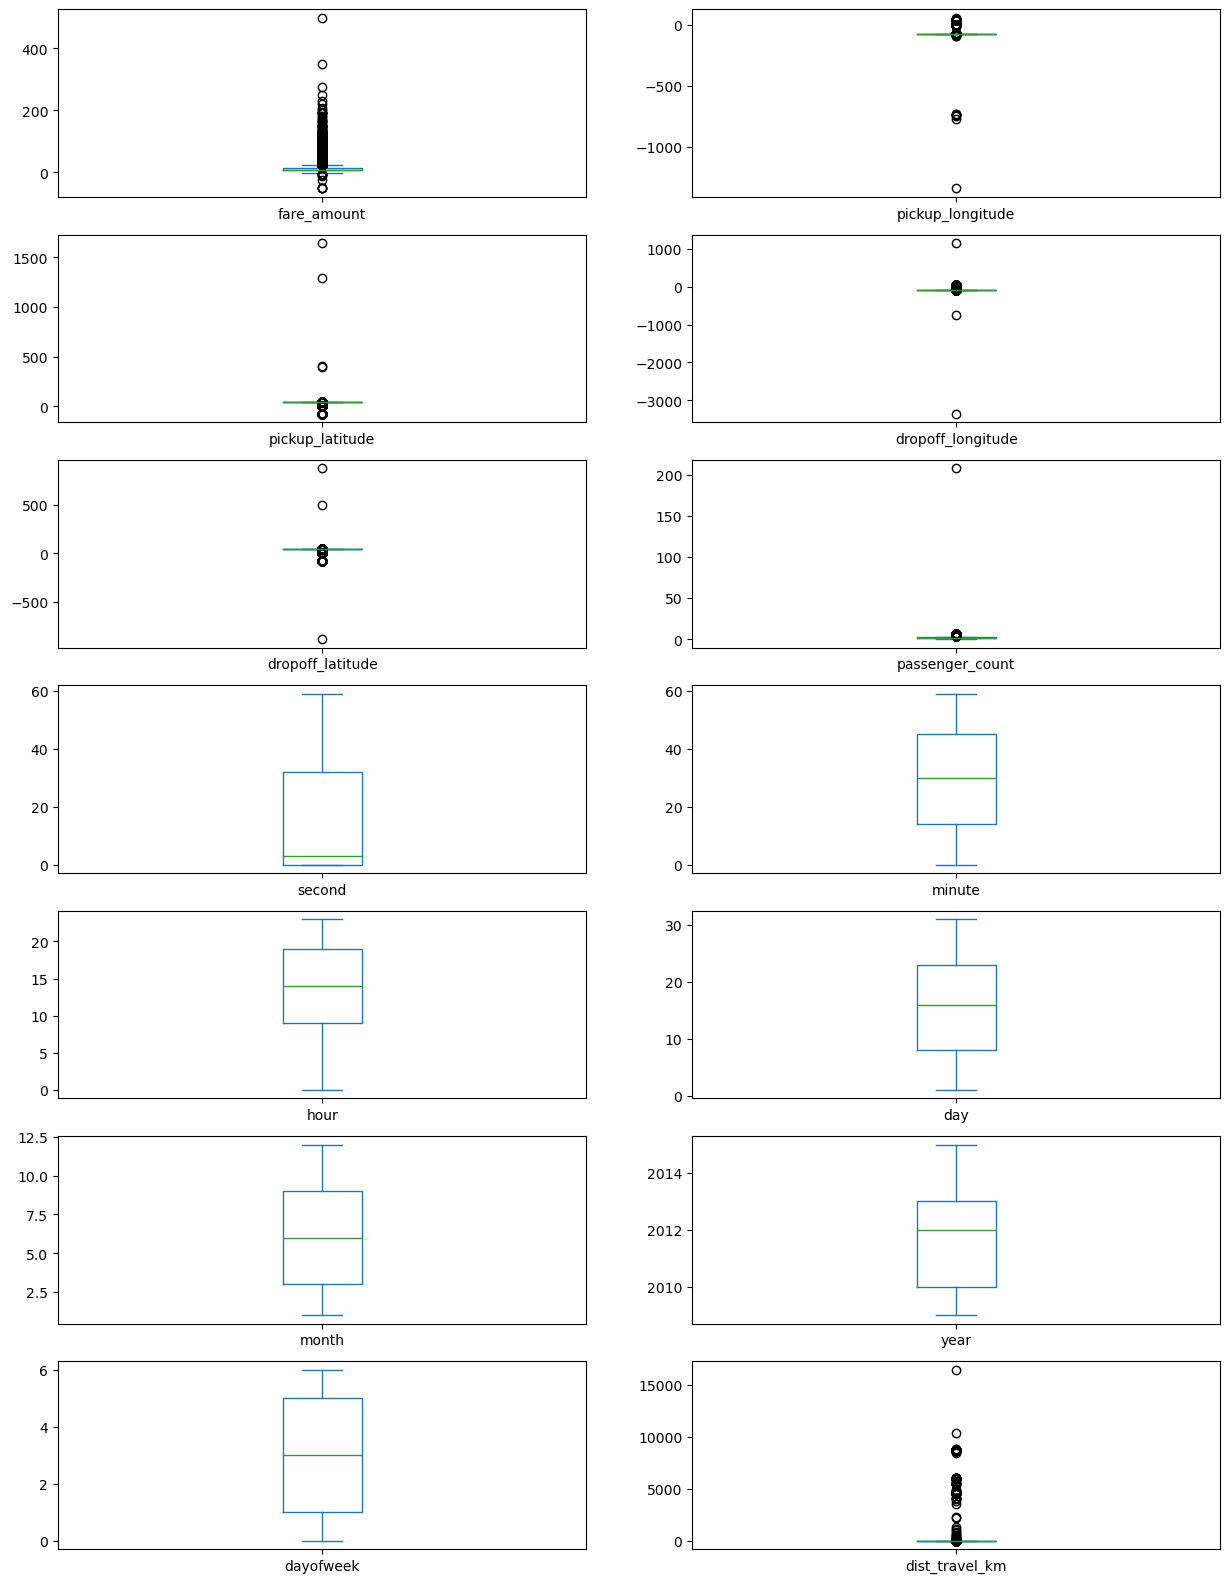

In [31]:
df.plot(kind="box", subplots=True, layout=(7, 2), figsize=(15, 20))  # Adjust layout to fit 14 subplots
plt.show()


In [32]:
import numpy as np

def remove_outlier(df1, col):
    # Calculate the first and third quartiles (Q1, Q3)
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    
    # Interquartile range
    IQR = Q3 - Q1
    
    # Calculate lower and upper whiskers for outliers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Clip the values in the column to the whisker limits (remove outliers)
    df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
    
    return df1

def treat_outliers_all(df1, col_list):
    # Apply outlier treatment to each column in the list
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

In [33]:
# Select only numeric columns 
numeric_cols = df.select_dtypes(include=['number']).columns 
# Treat outliers in all numeric columns 
df  = treat_outliers_all(df,  numeric_cols) 

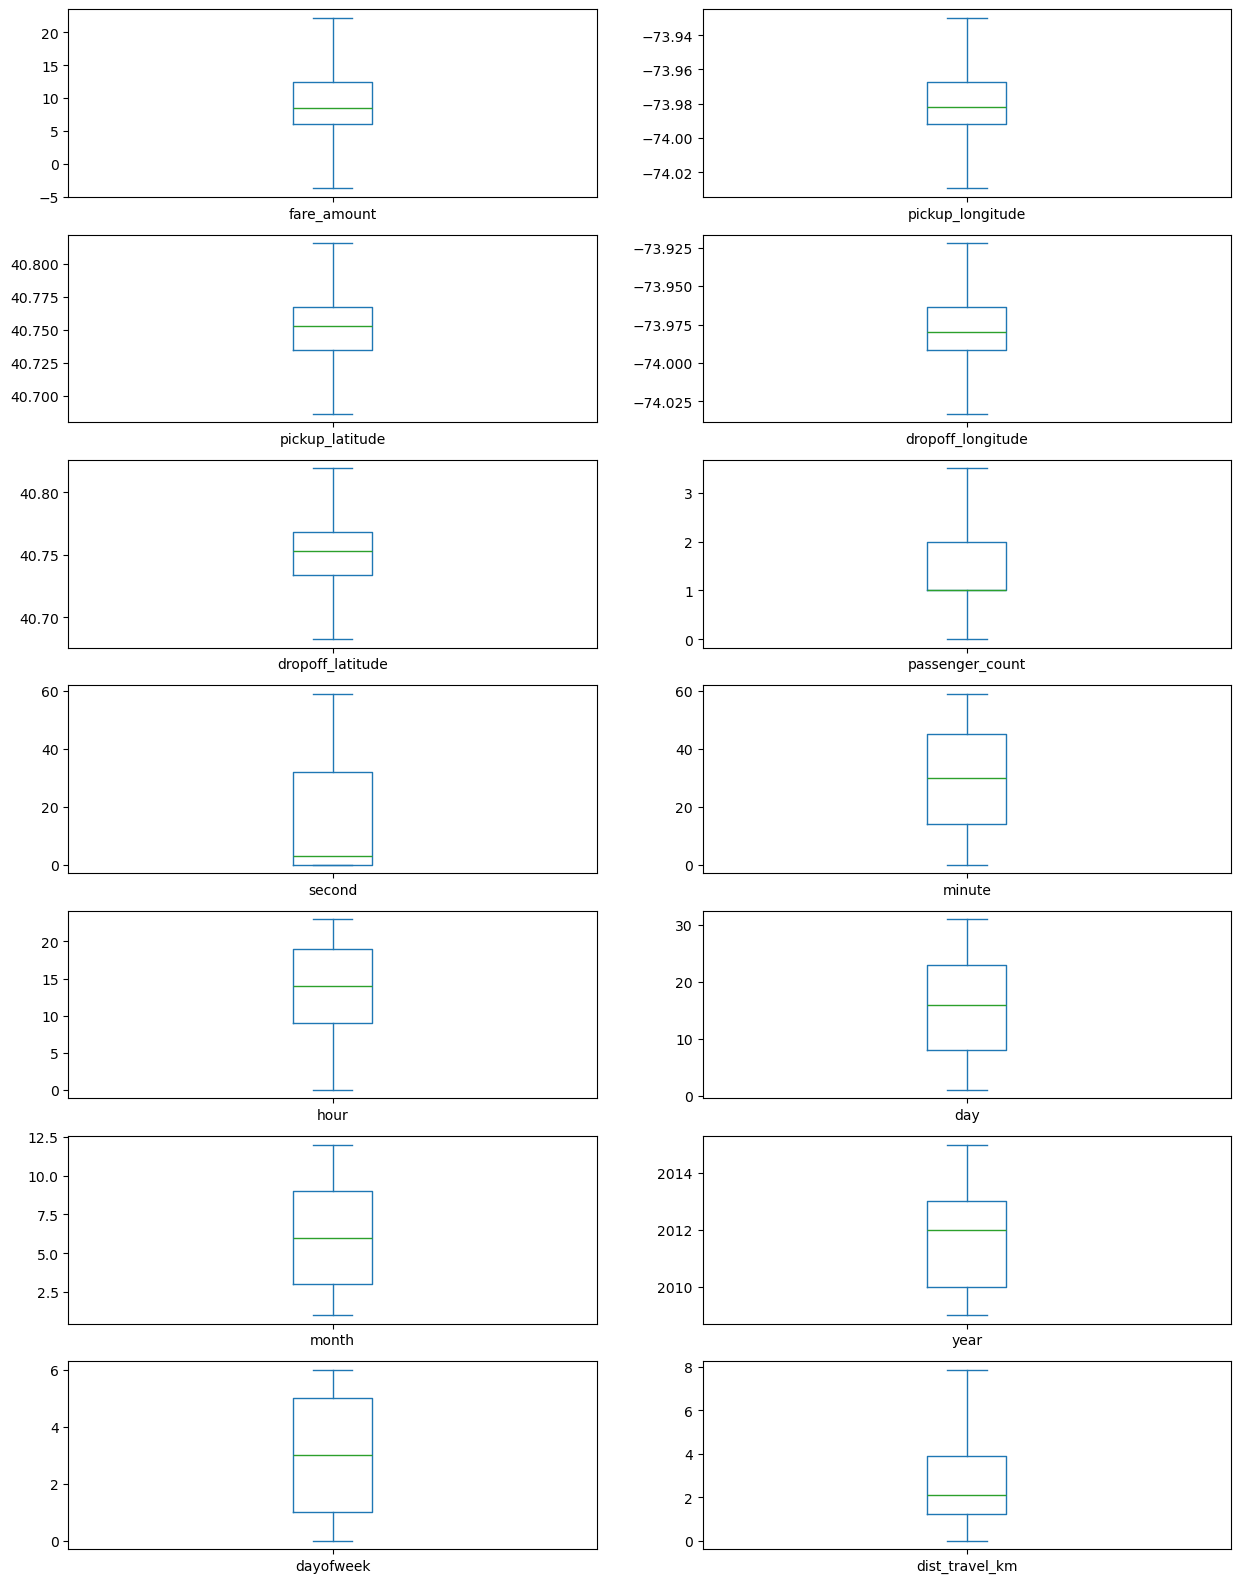

In [34]:
df.plot(kind  = "box",subplots  = True,layout  = (7,2),figsize=(15,20)) 
plt.show()

In [35]:
#Function to find the correlation 
corr = df.corr() 
corr 


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,0.002952,-0.009260,-0.023605,0.004552,0.030815,0.141271,0.013664,0.844369
pickup_longitude,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,-0.013322,-0.005801,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.098074
pickup_latitude,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,0.006049,-0.003461,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.046825
dropoff_longitude,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,-0.005252,-0.004846,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.186533
dropoff_latitude,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,0.005176,-0.003160,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.038873
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,-0.194277,0.001126,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009729
second,0.002952,-0.013322,0.006049,-0.005252,0.005176,-0.194277,1.000000,0.001974,-0.013223,-0.002090,-0.049940,0.083338,-0.000125,0.003474
minute,-0.009260,-0.005801,-0.003461,-0.004846,-0.003160,0.001126,0.001974,1.000000,0.001148,-0.001208,-0.001486,-0.002809,-0.002321,-0.009417
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,-0.013223,0.001148,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.038348
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,-0.002090,-0.001208,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.003080


<Axes: >

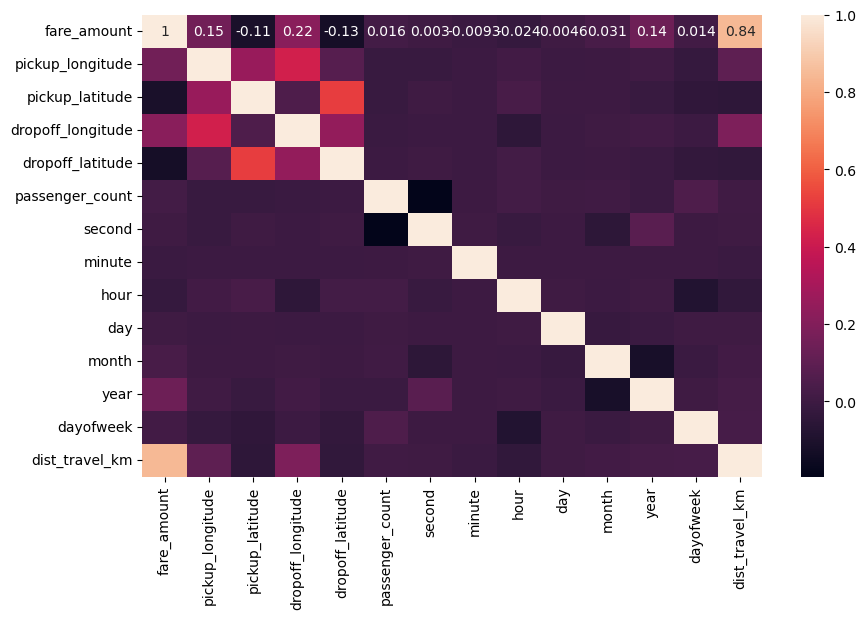

In [36]:
fig,axis  = plt.subplots(figsize  = (10,6)) 
sns.heatmap(df.corr(),annot = True) 

In [37]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]

In [38]:
y = df['fare_amount'] 

In [39]:
from sklearn.model_selection import train_test_split

# Assuming X and y have already been defined
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Optional: Print the shapes of the resulting datasets
print("Training set shape:", x_train.shape, y_train.shape)
print("Testing set shape:", x_test.shape, y_test.shape)

Training set shape: (159999, 5) (159999,)
Testing set shape: (40000, 5) (40000,)


In [40]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,second,minute,hour,day,month,year,dayofweek,dist_travel_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,6,52,19,7,5,2015,3,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,56,4,20,17,7,2009,4,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,0,45,21,24,8,2009,0,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,21,22,8,26,6,2009,4,1.661683
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,0,47,17,28,8,2014,3,4.475450


In [41]:
from sklearn.linear_model import LinearRegression 
regression = LinearRegression() 

In [42]:
regression.fit(x_train,y_train) 

LinearRegression()

In [43]:
regression.intercept_ #To f

7362.816651186291

In [44]:
regression.coef_

array([ 23.66231506, -13.85954836,  52.25558496, -28.75952837,
         0.11159511])

In [45]:
prediction = regression.predict(x_test)

In [46]:
print(prediction)

[10.14170182  8.65760111  9.25150738 ...  9.31175205 10.33553886
 15.59362833]


In [47]:
y_test  

160009    10.00
71744      5.00
73997      8.00
65511      5.30
164937    17.30
          ...  
34297     22.25
49619      9.70
16583     14.00
163996     3.80
195189    22.25
Name: fare_amount, Length: 40000, dtype: float64

In [48]:
from sklearn.metrics  import r2_score 

In [49]:
r2_score(y_test,prediction) 

0.09402787086098208

In [50]:
from sklearn.metrics  import mean_squared_error 

In [51]:
MSE = mean_squared_error(y_test,prediction) 

In [52]:
MSE

26.854047167841937

In [53]:
RMSE = np.sqrt(MSE) 

In [54]:
RMSE

5.182089073707816

In [55]:
from sklearn.ensemble  import RandomForestRegressor

In [56]:
rf = RandomForestRegressor(n_estimators=100) 

In [57]:
rf.fit(x_train,y_train) 

RandomForestRegressor()

In [58]:
y_pred = rf.predict(x_test)

In [59]:
y_pred

array([ 9.448 ,  4.89  ,  8.837 , ..., 11.17  ,  8.733 , 17.2135])

In [60]:
R2_Random = r2_score(y_test,y_pred)

In [61]:
R2_Random 

0.7603671557851901

In [62]:
MSE_Random = mean_squared_error(y_test,y_pred)

In [63]:
MSE_Random

7.102990803507579

In [64]:
RMSE_Random = np.sqrt(MSE_Random) 

In [65]:
RMSE_Random 

2.665143674083553